<a href="https://colab.research.google.com/github/nv-hiep/dust_MBB_fit/blob/main/MCMC_MBB_Fit_HERUS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modified BlackBody Fit**

# 1. Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/dustSED'

/content/gdrive/My Drive/Colab Notebooks/dustSED


# 3. Import Libraries



In [3]:
"""
MBB spectrum fitting with MCMC
"""

import os
import scipy, math
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from libs import constants, utils

plt.style.use('fivethirtyeight')

%matplotlib inline  

In [4]:
!pip3 install uncertainties

     |████████████████████████████████| 256kB 4.4MB/s 


In [5]:
#-------- MAIN --------#
'''
 n_sample : number of samples to take
 chains   : number of concurrent chains
 burn     : number of initial samples to burn
 thin     : multiple of samples to keep
'''
n_sample = 15000
chains   = 3
burn     = int(0.1*n_sample)
thin     = 5
chunk    = 250

# Path to the data 'df'
root_path = os.getcwd()
print(os.getcwd())
print(os.path.dirname(os.path.realpath('__file__')))

# Read data from csv
df = pd.read_csv(os.path.join(root_path, 'data', 'flux_measurements.csv')).set_index('Name')
df.head()

/content/gdrive/My Drive/Colab Notebooks/dustSED
/content/gdrive/My Drive/Colab Notebooks/dustSED


,RA,Dec,D,z,Origin,F60,F70,F100,F160,F250,F350,F500,sigma60,sigma70,sigma100,sigma160,sigma250,sigma350,sigma500,L_IR
Name,,,,,,,,,,,,,,,,,,,,
F00073+2538,09:53.4,+25:55:27.7,1.953438e+24,0.01523,GOALS,NaN,10480.0,14260.0,11850.0,5311.0,2026.0,718.0,NaN,520.0,710.0,590.0,347.0,134.0,46.0,11.12
F00085-1223,11:06.6,-12:06:28.2,2.515090e+24,0.01962,GOALS,NaN,18210.0,17680.0,10650.0,3573.0,1239.0,339.0,NaN,840.0,810.0,480.0,214.0,75.0,21.0,11.49
F00163-1039,18:50.4,-10:22:05.3,3.437804e+24,0.02722,GOALS,NaN,8038.0,9876.0,7496.0,2862.0,1209.0,419.0,NaN,403.0,495.0,375.0,189.0,81.0,33.0,11.48
F00344-3349,36:52.5,-33:33:17.2,2.635444e+24,0.02060,GOALS,NaN,6195.0,5096.0,2341.0,639.0,216.0,67.0,NaN,276.0,228.0,101.0,38.0,14.0,6.0,11.28
F00402-2349,42:49.3,-23:33:04.3,2.817518e+24,0.02217,GOALS,NaN,14600.0,20000.0,16110.0,6397.0,2441.0,703.0,NaN,560.0,770.0,600.0,323.0,124.0,35.0,11.44


In [6]:
# Arrange data into a dict. for each data-source 
# [GOALS: 219 samples, Cortese: 241, PCCS: 17, H-ATLAS: 1706, HERUS: 42]
data_sets = {data_source: df[df['Origin'] == data_source] for data_source in df['Origin'].unique()}

log_text = '\n'.join([f'\t{data_source}: {len(data_set)}' for data_source, data_set in data_sets.items()])
print(f'Data of {len(df)} objects:\n{log_text}')
print(f'MCMC will take {n_sample} samples for each object in {chains} chain(s)')

Data of 2225 objects:
	GOALS: 219
	Cortese: 241
	PCCS: 17
	H-ATLAS: 1706
	HERUS: 42
MCMC will take 15000 samples for each object in 3 chain(s)


In [7]:
# Run HERUS only
source   = 'HERUS'
data_set = data_sets[source]
# results = {source: _run(data_set, n_sample, chains, burn, thin, chunk) for source, data_set in data_sets.items()}
results = { source: utils._run(data_set, n_sample, chains, burn, thin, chunk) }
results


Running MCMC for HERUS: chunk 1 of 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [mass, beta, temperature]
100%|██████████| 17000/17000 [15:48<00:00, 17.93it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


27 with p >= 0.95


{'HERUS':                 temperature_mean  temperature_std  ...  mass_std  confidence
 Name                                               ...                      
 IRAS00397-1312         41.846686         1.670139  ...  0.015559    0.972134
 Mrk1014                44.791709         1.823662  ...  0.020063    0.789779
 3C273                  11.176716         0.049941  ...  0.007831    1.000000
 IRAS03521+0028         43.052521         1.362980  ...  0.018352    0.625621
 IRAS07598+6508         40.378859         1.166063  ...  0.013515    0.990915
 IRAS10378+1109         42.389952         1.520454  ...  0.017909    0.999803
 IRAS03158+4227         42.334963         1.707334  ...  0.025783    0.917168
 IRAS16090-0139         37.577484         0.596461  ...  0.008666    0.925711
 IRAS20100-4156         38.391492         0.880102  ...  0.013316    0.982282
 IRAS23253-5415         37.723672         0.945745  ...  0.016195    0.915779
 IRAS00188-0856         37.433195         1.101094  ...

In [21]:
# Results for HERUS
res_herus = results[source]
res_herus = res_herus[ res_herus['confidence'] > 0.95 ]
res_herus

,temperature_mean,temperature_std,beta_mean,beta_std,mass_mean,mass_std,confidence
Name,,,,,,,
IRAS00397-1312,41.846686,1.670139,2.025887,0.112154,8.507714,0.015559,0.972134
3C273,11.176716,0.049941,0.003452,0.003503,10.569518,0.007831,1.000000
IRAS07598+6508,40.378859,1.166063,1.609158,0.078067,8.363667,0.013515,0.990915
IRAS10378+1109,42.389952,1.520454,1.608386,0.082457,8.241157,0.017909,0.999803
IRAS20100-4156,38.391492,0.880102,1.996791,0.049622,8.534675,0.013316,0.982282
IRAS13451+1232,77.637391,2.116688,0.127129,0.041741,8.024009,0.016006,1.000000
IRAS23230-6926,39.110434,0.999578,1.998879,0.069989,8.162074,0.011886,0.998509
IRAS20087-0308,34.059947,0.592954,1.875308,0.031376,8.774719,0.012214,0.984718
IRAS06206-6315,36.739925,0.496695,1.719837,0.035237,8.469278,0.007644,0.999723


In [22]:
res_herus.index

Index(['IRAS00397-1312', '3C273', 'IRAS07598+6508', 'IRAS10378+1109',
       'IRAS20100-4156', 'IRAS13451+1232', 'IRAS23230-6926', 'IRAS20087-0308',
       'IRAS06206-6315', 'IRAS20414-1651', 'IRAS19297-0406', 'IRAS14348-1447',
       'IRAS06035-7102', 'IRAS22491-1808', 'IRAS14378-3651', 'IRAS23365+3604',
       'IRAS19254-7245', 'IRAS08572+3915', 'IRAS10565+2448', 'IRAS20551-4250',
       'IRAS05189-2524', 'IRAS17208-0014', 'Mrk231', 'UGC5101', 'Mrk273',
       'NGC6240', 'Arp220'],
      dtype='object', name='Name')

In [23]:
# Fitted parameters
temp = res_herus['temperature_mean'].to_numpy()
beta = res_herus['beta_mean'].to_numpy()
mass = res_herus['mass_mean'].to_numpy()         # in fact, this is log-mass

In [24]:
# Take only the samples/rows of the PCCS results
data_set = data_set[ data_set.index.isin(res_herus.index) ]
data_set

,RA,Dec,D,z,Origin,F60,F70,F100,F160,F250,F350,F500,sigma60,sigma70,sigma100,sigma160,sigma250,sigma350,sigma500,L_IR
Name,,,,,,,,,,,,,,,,,,,,
IRAS00397-1312,00h42m15.53s,-12d56m02.8s,3.316932e+25,0.261717,HERUS,1832.0,NaN,1900.0,NaN,389.0,130.0,40.0,128.0,NaN,171.0,NaN,4.0,4.0,5.0,NaN
3C273,12h29m06.70s,+02d03m08.6s,2.006747e+25,0.158339,HERUS,2060.0,NaN,2890.0,NaN,437.0,633.0,994.0,144.0,NaN,202.3,NaN,4.0,4.0,5.0,NaN
IRAS07598+6508,08h04m33.08s,+64d59m48.6s,1.879515e+25,0.148300,HERUS,1692.0,NaN,1730.0,NaN,500.0,197.0,58.0,85.0,NaN,190.3,NaN,4.0,4.0,5.0,NaN
IRAS10378+1109,10h40m29.17s,+10d53m18.3s,1.727101e+25,0.136274,HERUS,2281.0,NaN,1820.0,NaN,480.0,183.0,50.0,137.0,NaN,163.8,NaN,4.0,4.0,5.0,NaN
IRAS20100-4156,20h13m29.54s,-41d47m34.9s,1.642301e+25,0.129583,HERUS,5228.0,NaN,5170.0,NaN,1001.0,349.0,102.0,314.0,NaN,361.9,NaN,4.0,4.0,5.0,NaN
IRAS13451+1232,13h47m33.36s,+12d17m24.2s,1.542901e+25,0.121740,HERUS,1916.0,NaN,2060.0,NaN,503.0,256.0,197.0,211.0,NaN,185.4,NaN,5.0,4.0,6.0,NaN
IRAS23230-6926,23h26m03.62s,-69d10m18.8s,1.350894e+25,0.106590,HERUS,3744.0,NaN,3420.0,NaN,617.0,204.0,64.0,150.0,NaN,205.2,NaN,4.0,4.0,5.0,NaN
IRAS20087-0308,20h11m23.87s,-02d59m50.7s,1.339234e+25,0.105670,HERUS,4700.0,NaN,6540.0,NaN,1804.0,687.0,210.0,282.0,NaN,523.2,NaN,6.0,4.0,5.0,NaN
IRAS06206-6315,06h21m01.21s,-63d17m23.5s,1.171573e+25,0.092441,HERUS,3959.0,NaN,4580.0,NaN,1248.0,477.0,158.0,119.0,NaN,274.8,NaN,5.0,4.0,5.0,NaN


In [25]:
# Save results
from os.path import join
filename = "-".join([source, str(n_sample), str(chains), str(burn), str(thin)])
# traces.to_csv(join(root_path, 'results', filename + '.csv'), mode='w+')

import pickle

with open(join(root_path, 'results', filename + '_herus.pickle'), 'wb') as output_file:
  pickle.dump(results, output_file)


# results = pickle.load( open( join(root_path, 'results', filename + '_ok.pickle'), 'rb' ) )

In [26]:
# Infor of the dataset: wavelengths, frequencies and flux
obs         = utils.Obs(data_set)
nu          = obs.freq_
lambda_     = 1e6*obs.lambda_
flux, err   = obs.flux_
flux

,F60,F100,F250,F350,F500
Name,,,,,
IRAS00397-1312,1832.0,1900.0,389.0,130.0,40.0
3C273,2060.0,2890.0,437.0,633.0,994.0
IRAS07598+6508,1692.0,1730.0,500.0,197.0,58.0
IRAS10378+1109,2281.0,1820.0,480.0,183.0,50.0
IRAS20100-4156,5228.0,5170.0,1001.0,349.0,102.0
IRAS13451+1232,1916.0,2060.0,503.0,256.0,197.0
IRAS23230-6926,3744.0,3420.0,617.0,204.0,64.0
IRAS20087-0308,4700.0,6540.0,1804.0,687.0,210.0
IRAS06206-6315,3959.0,4580.0,1248.0,477.0,158.0


In [27]:
# For plotting: Frequency Values for the X-axis
lambda_grid = np.logspace(1.6, 3, 100)
nu_grid     = constants.c/(1.e-6*lambda_grid)

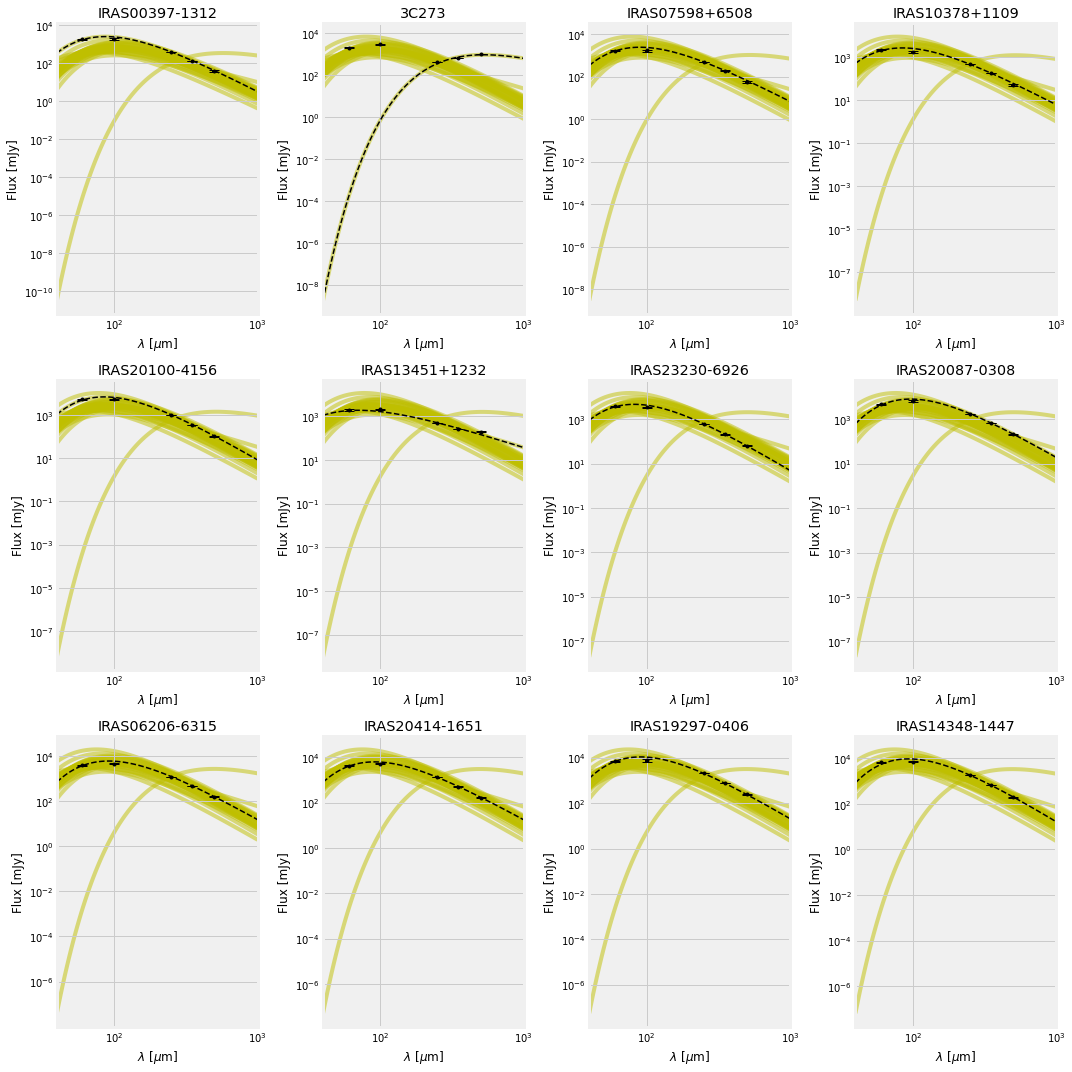

In [29]:
# For plotting
ncols     = 4
nrows     = len(data_set.index)//ncols if len(data_set.index)%ncols==0 else len(data_set.index)//ncols + 1
fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(15, 15))
axes      = axes.flatten()

# use iterrows() to make a generator
for id, data in data_set.reset_index().iterrows():
  if id > 11:
    break

  ax  = axes[id]
  idx = data['Name']

  flux_predict = utils.MBB_model(nu_grid, temp[id], beta[id], mass[id], data['D'], data['z'])
  # trace_values = MBB_model(nu_grid, temp, beta, mass, data['D'], data['z'])[::5].T
  trace_values = utils.MBB_model(nu_grid, temp, beta, mass, data['D'], data['z']).T

  # plotting
  ax.plot(lambda_grid, trace_values, zorder=0, color='y', alpha=0.5)
  ax.errorbar(lambda_, flux.loc[idx], yerr=err.loc[idx], zorder=1, fmt='.', capsize=5, color='k')
  ax.plot(lambda_grid, flux_predict, linestyle='--', zorder=2, color='k', alpha=1., linewidth=1.5);

  # Decorate
  ax.set_ylabel('Flux [mJy]')
  ax.set_xlabel(r'$\lambda$ [$\mu$m]')
  ax.set_title(idx)
  ax.set_yscale('log')
  ax.set_xscale('log')
  ax.set_xlim(min(lambda_grid), max(lambda_grid))
# End - for

plt.tight_layout()
plt.show()